In [1]:
import numpy as np
import pandas as pd
import os
import math
import sys
import matplotlib.pyplot as plt
import tarfile
from tqdm import tqdm
import sqlite3 as sql
# 1 min 15 sec

In [2]:
sys.path.append('/groups/icecube/cyan/Utils')
from PlotUtils import setMplParam, getColour, getHistoParam 
# getHistoParam:
# Nbins, binwidth, bins, counts, bin_centers  = 
from DB_lister import list_content, list_tables
from ExternalFunctions import nice_string_output, add_text_to_ax
setMplParam()

In [3]:
root_dir = "/lustre/hpc/project/icecube/HE_Nu_Aske_Oct2024/"
original_file_dir = root_dir + "tar.gz/"

In [4]:
print("files in the directory: ",len(os.listdir(original_file_dir)))

files in the directory:  2


In [23]:
def safemembers(members):
    for member in members:
        # Check for absolute paths and relative paths with '..'
        if not os.path.isabs(member.name) and ".." not in member.name:
            yield member

In [24]:
def extract_all_tar_gz(src_dir, dest_dir):
    # Check if destination directory exists; if not, create it
    if not os.path.exists(dest_dir):
        os.makedirs(dest_dir)

    # Loop through each file in the source directory
    for filename in tqdm(os.listdir(src_dir)):
        # Check if the file is a .tar.gz file
        if filename.endswith('.tar.gz'):
            file_path = os.path.join(src_dir, filename)
            print(f"Extracting {file_path}...")

            # Open and extract the tar.gz file
            with tarfile.open(file_path, 'r:gz') as tar:
                tar.extractall(path=dest_dir, members=safemembers(tar))

            print(f"Extracted {filename} to {dest_dir}")

In [25]:
corsika_source_dir = "/lustre/hpc/project/icecube/HE_Nu_Aske_Oct2024/tar.gz/Corsika_l2"
corsika_dest_dir = "/lustre/hpc/project/icecube/HE_Nu_Aske_Oct2024/sqlite_pulses/Corsika"
extract_all_tar_gz(corsika_source_dir, corsika_dest_dir)
# 17 min per each tar.gz file(31GB)
# 8 files: 2 hours 16 min
# actual time: 140 min = 2 hours 20 min

  0%|          | 0/8 [00:00<?, ?it/s]/usr/lib64/python3.9/tarfile.py:2239: RuntimeWarning: The default behavior of tarfile extraction has been changed to disallow common exploits (including CVE-2007-4559). By default, absolute/parent paths are disallowed and some mode bits are cleared. See https://access.redhat.com/articles/7004769 for more details.
  warnings.warn(


Extracting /lustre/hpc/project/icecube/HE_Nu_Aske_Oct2024/tar.gz/Corsika_l2/20848_0009000_0009999.tar.gz...


 12%|█▎        | 1/8 [17:38<2:03:31, 1058.76s/it]

Extracted 20848_0009000_0009999.tar.gz to /lustre/hpc/project/icecube/HE_Nu_Aske_Oct2024/sqlite_pulses/Corsika
Extracting /lustre/hpc/project/icecube/HE_Nu_Aske_Oct2024/tar.gz/Corsika_l2/20848_0005000_0005999.tar.gz...


 25%|██▌       | 2/8 [35:09<1:45:25, 1054.29s/it]

Extracted 20848_0005000_0005999.tar.gz to /lustre/hpc/project/icecube/HE_Nu_Aske_Oct2024/sqlite_pulses/Corsika
Extracting /lustre/hpc/project/icecube/HE_Nu_Aske_Oct2024/tar.gz/Corsika_l2/20848_0003000_0003999.tar.gz...


 38%|███▊      | 3/8 [52:40<1:27:41, 1052.38s/it]

Extracted 20848_0003000_0003999.tar.gz to /lustre/hpc/project/icecube/HE_Nu_Aske_Oct2024/sqlite_pulses/Corsika
Extracting /lustre/hpc/project/icecube/HE_Nu_Aske_Oct2024/tar.gz/Corsika_l2/20848_0008000_0008999.tar.gz...


 50%|█████     | 4/8 [1:10:07<1:10:01, 1050.25s/it]

Extracted 20848_0008000_0008999.tar.gz to /lustre/hpc/project/icecube/HE_Nu_Aske_Oct2024/sqlite_pulses/Corsika
Extracting /lustre/hpc/project/icecube/HE_Nu_Aske_Oct2024/tar.gz/Corsika_l2/20848_0004000_0004999.tar.gz...


 62%|██████▎   | 5/8 [1:27:41<52:35, 1051.95s/it]  

Extracted 20848_0004000_0004999.tar.gz to /lustre/hpc/project/icecube/HE_Nu_Aske_Oct2024/sqlite_pulses/Corsika
Extracting /lustre/hpc/project/icecube/HE_Nu_Aske_Oct2024/tar.gz/Corsika_l2/20848_0002000_0002999.tar.gz...


 75%|███████▌  | 6/8 [1:45:07<34:59, 1049.79s/it]

Extracted 20848_0002000_0002999.tar.gz to /lustre/hpc/project/icecube/HE_Nu_Aske_Oct2024/sqlite_pulses/Corsika
Extracting /lustre/hpc/project/icecube/HE_Nu_Aske_Oct2024/tar.gz/Corsika_l2/20848_0007000_0007999.tar.gz...


 88%|████████▊ | 7/8 [2:02:38<17:30, 1050.05s/it]

Extracted 20848_0007000_0007999.tar.gz to /lustre/hpc/project/icecube/HE_Nu_Aske_Oct2024/sqlite_pulses/Corsika
Extracting /lustre/hpc/project/icecube/HE_Nu_Aske_Oct2024/tar.gz/Corsika_l2/20848_0006000_0006999.tar.gz...


100%|██████████| 8/8 [2:20:17<00:00, 1052.22s/it]

Extracted 20848_0006000_0006999.tar.gz to /lustre/hpc/project/icecube/HE_Nu_Aske_Oct2024/sqlite_pulses/Corsika


In [26]:
snowstorm_source_dir = "/lustre/hpc/project/icecube/HE_Nu_Aske_Oct2024/tar.gz/Snowstorm_l2"
snowstorm_dest_dir = "/lustre/hpc/project/icecube/HE_Nu_Aske_Oct2024/sqlite_pulses/Snowstorm"
extract_all_tar_gz(snowstorm_source_dir, snowstorm_dest_dir)
# 315 min = 5 hours 15 min

  0%|          | 0/27 [00:00<?, ?it/s]

Extracting /lustre/hpc/project/icecube/HE_Nu_Aske_Oct2024/tar.gz/Snowstorm_l2/22081.tar.gz...


/usr/lib64/python3.9/tarfile.py:2239: RuntimeWarning: The default behavior of tarfile extraction has been changed to disallow common exploits (including CVE-2007-4559). By default, absolute/parent paths are disallowed and some mode bits are cleared. See https://access.redhat.com/articles/7004769 for more details.
  warnings.warn(
  4%|▎         | 1/27 [02:16<59:15, 136.77s/it]

Extracted 22081.tar.gz to /lustre/hpc/project/icecube/HE_Nu_Aske_Oct2024/sqlite_pulses/Snowstorm
Extracting /lustre/hpc/project/icecube/HE_Nu_Aske_Oct2024/tar.gz/Snowstorm_l2/22017.tar.gz...


  7%|▋         | 2/27 [09:00<2:02:28, 293.95s/it]

Extracted 22017.tar.gz to /lustre/hpc/project/icecube/HE_Nu_Aske_Oct2024/sqlite_pulses/Snowstorm
Extracting /lustre/hpc/project/icecube/HE_Nu_Aske_Oct2024/tar.gz/Snowstorm_l2/22083.tar.gz...


 11%|█         | 3/27 [17:33<2:37:33, 393.89s/it]

Extracted 22083.tar.gz to /lustre/hpc/project/icecube/HE_Nu_Aske_Oct2024/sqlite_pulses/Snowstorm
Extracting /lustre/hpc/project/icecube/HE_Nu_Aske_Oct2024/tar.gz/Snowstorm_l2/22018.tar.gz...


 15%|█▍        | 4/27 [1:00:38<8:02:36, 1258.96s/it]

Extracted 22018.tar.gz to /lustre/hpc/project/icecube/HE_Nu_Aske_Oct2024/sqlite_pulses/Snowstorm
Extracting /lustre/hpc/project/icecube/HE_Nu_Aske_Oct2024/tar.gz/Snowstorm_l2/22043.tar.gz...


 19%|█▊        | 5/27 [1:03:48<5:20:13, 873.35s/it] 

Extracted 22043.tar.gz to /lustre/hpc/project/icecube/HE_Nu_Aske_Oct2024/sqlite_pulses/Snowstorm
Extracting /lustre/hpc/project/icecube/HE_Nu_Aske_Oct2024/tar.gz/Snowstorm_l2/22015.tar.gz...


 22%|██▏       | 6/27 [1:28:17<6:16:36, 1076.04s/it]

Extracted 22015.tar.gz to /lustre/hpc/project/icecube/HE_Nu_Aske_Oct2024/sqlite_pulses/Snowstorm
Extracting /lustre/hpc/project/icecube/HE_Nu_Aske_Oct2024/tar.gz/Snowstorm_l2/22079.tar.gz...


 26%|██▌       | 7/27 [1:35:31<4:48:41, 866.09s/it] 

Extracted 22079.tar.gz to /lustre/hpc/project/icecube/HE_Nu_Aske_Oct2024/sqlite_pulses/Snowstorm
Extracting /lustre/hpc/project/icecube/HE_Nu_Aske_Oct2024/tar.gz/Snowstorm_l2/22013.tar.gz...


 30%|██▉       | 8/27 [1:39:14<3:29:26, 661.37s/it]

Extracted 22013.tar.gz to /lustre/hpc/project/icecube/HE_Nu_Aske_Oct2024/sqlite_pulses/Snowstorm
Extracting /lustre/hpc/project/icecube/HE_Nu_Aske_Oct2024/tar.gz/Snowstorm_l2/22048.tar.gz...


 33%|███▎      | 9/27 [1:39:45<2:19:17, 464.30s/it]

Extracted 22048.tar.gz to /lustre/hpc/project/icecube/HE_Nu_Aske_Oct2024/sqlite_pulses/Snowstorm
Extracting /lustre/hpc/project/icecube/HE_Nu_Aske_Oct2024/tar.gz/Snowstorm_l2/22085.tar.gz...


 37%|███▋      | 10/27 [1:42:06<1:43:13, 364.35s/it]

Extracted 22085.tar.gz to /lustre/hpc/project/icecube/HE_Nu_Aske_Oct2024/sqlite_pulses/Snowstorm
Extracting /lustre/hpc/project/icecube/HE_Nu_Aske_Oct2024/tar.gz/Snowstorm_l2/22045.tar.gz...


 41%|████      | 11/27 [1:42:39<1:10:09, 263.08s/it]

Extracted 22045.tar.gz to /lustre/hpc/project/icecube/HE_Nu_Aske_Oct2024/sqlite_pulses/Snowstorm
Extracting /lustre/hpc/project/icecube/HE_Nu_Aske_Oct2024/tar.gz/Snowstorm_l2/22011.tar.gz...


 44%|████▍     | 12/27 [2:03:21<2:20:10, 560.70s/it]

Extracted 22011.tar.gz to /lustre/hpc/project/icecube/HE_Nu_Aske_Oct2024/sqlite_pulses/Snowstorm
Extracting /lustre/hpc/project/icecube/HE_Nu_Aske_Oct2024/tar.gz/Snowstorm_l2/22047.tar.gz...


 48%|████▊     | 13/27 [2:07:03<1:46:56, 458.32s/it]

Extracted 22047.tar.gz to /lustre/hpc/project/icecube/HE_Nu_Aske_Oct2024/sqlite_pulses/Snowstorm
Extracting /lustre/hpc/project/icecube/HE_Nu_Aske_Oct2024/tar.gz/Snowstorm_l2/22084.tar.gz...


 52%|█████▏    | 14/27 [2:09:08<1:17:28, 357.61s/it]

Extracted 22084.tar.gz to /lustre/hpc/project/icecube/HE_Nu_Aske_Oct2024/sqlite_pulses/Snowstorm
Extracting /lustre/hpc/project/icecube/HE_Nu_Aske_Oct2024/tar.gz/Snowstorm_l2/22044.tar.gz...


 56%|█████▌    | 15/27 [2:17:41<1:20:51, 404.30s/it]

Extracted 22044.tar.gz to /lustre/hpc/project/icecube/HE_Nu_Aske_Oct2024/sqlite_pulses/Snowstorm
Extracting /lustre/hpc/project/icecube/HE_Nu_Aske_Oct2024/tar.gz/Snowstorm_l2/22012.tar.gz...


 59%|█████▉    | 16/27 [3:14:27<3:59:46, 1307.88s/it]

Extracted 22012.tar.gz to /lustre/hpc/project/icecube/HE_Nu_Aske_Oct2024/sqlite_pulses/Snowstorm
Extracting /lustre/hpc/project/icecube/HE_Nu_Aske_Oct2024/tar.gz/Snowstorm_l2/22049.tar.gz...


 63%|██████▎   | 17/27 [3:15:26<2:35:23, 932.34s/it] 

Extracted 22049.tar.gz to /lustre/hpc/project/icecube/HE_Nu_Aske_Oct2024/sqlite_pulses/Snowstorm
Extracting /lustre/hpc/project/icecube/HE_Nu_Aske_Oct2024/tar.gz/Snowstorm_l2/22046.tar.gz...


 67%|██████▋   | 18/27 [3:17:10<1:42:30, 683.38s/it]

Extracted 22046.tar.gz to /lustre/hpc/project/icecube/HE_Nu_Aske_Oct2024/sqlite_pulses/Snowstorm
Extracting /lustre/hpc/project/icecube/HE_Nu_Aske_Oct2024/tar.gz/Snowstorm_l2/22086.tar.gz...


 70%|███████   | 19/27 [3:32:06<1:39:38, 747.28s/it]

Extracted 22086.tar.gz to /lustre/hpc/project/icecube/HE_Nu_Aske_Oct2024/sqlite_pulses/Snowstorm
Extracting /lustre/hpc/project/icecube/HE_Nu_Aske_Oct2024/tar.gz/Snowstorm_l2/22010.tar.gz...


 74%|███████▍  | 20/27 [4:05:08<2:10:25, 1117.97s/it]

Extracted 22010.tar.gz to /lustre/hpc/project/icecube/HE_Nu_Aske_Oct2024/sqlite_pulses/Snowstorm
Extracting /lustre/hpc/project/icecube/HE_Nu_Aske_Oct2024/tar.gz/Snowstorm_l2/22050.tar.gz...


 78%|███████▊  | 21/27 [4:11:38<1:29:57, 899.50s/it] 

Extracted 22050.tar.gz to /lustre/hpc/project/icecube/HE_Nu_Aske_Oct2024/sqlite_pulses/Snowstorm
Extracting /lustre/hpc/project/icecube/HE_Nu_Aske_Oct2024/tar.gz/Snowstorm_l2/22016.tar.gz...


 81%|████████▏ | 22/27 [4:15:09<57:44, 692.90s/it]  

Extracted 22016.tar.gz to /lustre/hpc/project/icecube/HE_Nu_Aske_Oct2024/sqlite_pulses/Snowstorm
Extracting /lustre/hpc/project/icecube/HE_Nu_Aske_Oct2024/tar.gz/Snowstorm_l2/22080.tar.gz...


 85%|████████▌ | 23/27 [4:35:15<56:26, 846.74s/it]

Extracted 22080.tar.gz to /lustre/hpc/project/icecube/HE_Nu_Aske_Oct2024/sqlite_pulses/Snowstorm
Extracting /lustre/hpc/project/icecube/HE_Nu_Aske_Oct2024/tar.gz/Snowstorm_l2/22078.tar.gz...


 89%|████████▉ | 24/27 [4:55:10<47:34, 951.34s/it]

Extracted 22078.tar.gz to /lustre/hpc/project/icecube/HE_Nu_Aske_Oct2024/sqlite_pulses/Snowstorm
Extracting /lustre/hpc/project/icecube/HE_Nu_Aske_Oct2024/tar.gz/Snowstorm_l2/22014.tar.gz...


 93%|█████████▎| 25/27 [5:06:38<29:04, 872.40s/it]

Extracted 22014.tar.gz to /lustre/hpc/project/icecube/HE_Nu_Aske_Oct2024/sqlite_pulses/Snowstorm
Extracting /lustre/hpc/project/icecube/HE_Nu_Aske_Oct2024/tar.gz/Snowstorm_l2/22082.tar.gz...


 96%|█████████▋| 26/27 [5:10:29<11:20, 680.03s/it]

Extracted 22082.tar.gz to /lustre/hpc/project/icecube/HE_Nu_Aske_Oct2024/sqlite_pulses/Snowstorm
Extracting /lustre/hpc/project/icecube/HE_Nu_Aske_Oct2024/tar.gz/Snowstorm_l2/22042.tar.gz...


100%|██████████| 27/27 [5:15:31<00:00, 701.18s/it]

Extracted 22042.tar.gz to /lustre/hpc/project/icecube/HE_Nu_Aske_Oct2024/sqlite_pulses/Snowstorm


In [5]:
# 22010: 1e2 - 1e4 NuMu
# 22011: 1e4 - 1e6 NuMu
# 22012: 1e6 - 1e8 NuMu
# 22013: 1e2 - 1e4 NuE
# 22014: 1e4 - 1e6 NuE
# 22015: 1e6 - 1e8 NuE
# 22016: 1e2 - 1e4 NuTau
# 22017: 1e4 - 1e6 NuTau
# 22018: 1e6 - 1e8 NuTau

In [5]:
db_NuMu_6_8 = "/lustre/hpc/project/icecube/HE_Nu_Aske_Oct2024/sqlite_pulses/Snowstorm/22012/merged_part_1.db"
db_NuMu_4_6 = "/lustre/hpc/project/icecube/HE_Nu_Aske_Oct2024/sqlite_pulses/Snowstorm/22011/merged_part_1.db"
db_NuMu_2_4 = "/lustre/hpc/project/icecube/HE_Nu_Aske_Oct2024/sqlite_pulses/Snowstorm/22010/merged_part_1.db"
db_Corsika_5_1 = "/lustre/hpc/project/icecube/HE_Nu_Aske_Oct2024/sqlite_pulses/Corsika/0005000-0005999/merged_part_1.db"
db_Corsika_3_1 = "/lustre/hpc/project/icecube/HE_Nu_Aske_Oct2024/sqlite_pulses/Corsika/0003000-0003999/merged_part_1.db"
db_Corsika_7_7 = "/lustre/hpc/project/icecube/HE_Nu_Aske_Oct2024/sqlite_pulses/Corsika/0007000-0007999/merged_part_7.db"


In [6]:
list_tables(db_NuMu_6_8)
list_tables(db_Corsika_5_1)

['truth', 'SRTInIcePulses', 'event_no_SRTInIcePulses', 'OnlineL2_SplineMPE', 'LineFit', 'GNHighestEInIceParticle', 'GNHighestEDaughter', 'MCWeightDict', 'SnowStormParameters', 'FilterMask', 'idx_event_no', 'idx_dom_position', 'idx_string_dom_number']
['truth', 'SRTInIcePulses', 'event_no_SRTInIcePulses', 'OnlineL2_SplineMPE', 'LineFit', 'GNHighestEInIceParticle', 'GNHighestEDaughter', 'MCWeightDict', 'FilterMask']


In [7]:
import sqlite3 as sql

In [8]:
def convertDBtoDF(file:str, table:str, N_events:int = None) -> pd.DataFrame:
    con = sql.connect(file)
    # if N_events is None or N_events > N_events_total:
    #     N_events = N_events_total
    # Query to fetch the first `N_events` unique event_no values
    event_no_query = f'SELECT DISTINCT event_no FROM {table} LIMIT {N_events}'
    event_nos = pd.read_sql_query(event_no_query, con)['event_no'].tolist()
    
    # Use the selected event_no values to filter the main data
    event_filter = ','.join(map(str, event_nos))  # Convert to comma-separated string for SQL IN clause
    query = f'SELECT * FROM {table} WHERE event_no IN ({event_filter})'
    
    # Read data and close the connection
    df = pd.read_sql_query(query, con)
    con.close()
    
    return df

In [9]:
def get_table_event_count(conn: sql.Connection, table: str) -> int:
    cursor = conn.cursor()
    cursor.execute(f"SELECT COUNT(DISTINCT event_no) FROM {table}")
    event_count = cursor.fetchone()[0]
    return event_count

In [10]:
def print_table_event_count(file: str, table: str):
    conn = sql.connect(file)
    event_count = get_table_event_count(conn, table)
    print(f"Table {table} has {event_count:,} unique events")
    conn.close()

In [11]:
# print_table_event_count(db_NuMu_2_4, "SRTInIcePulses")
# 4,240,372 events
# 2 min 40 sec

In [12]:
# print_table_event_count(db_NuMu_4_6, "SRTInIcePulses")
# 400,516 events
# 2 min 30 sec

In [13]:
# print_table_event_count(db_NuMu_6_8, "SRTInIcePulses")
# 29,386 events
# 3 min

In [14]:
# print_table_event_count(db_Corsika_5_1, "SRTInIcePulses")
# 234,283 events
# 3 min 45 sec

In [15]:
# print_table_event_count(db_Corsika_3_1, "SRTInIcePulses")

In [16]:
# print_table_event_count(db_Corsika_7_7, "SRTInIcePulses")
# 233,188 events

In [ ]:
df_NuMu_2_4_MCWeightDic = convertDBtoDF(db_NuMu_2_4, "MCWeightDict", 1000)
c = convertDBtoDF(db_NuMu_2_4, "truth", 1000)

In [22]:
df_NuMu_2_4_MCWeightDic.columns

Index(['BjorkenX', 'BjorkenY', 'CylinderHeight', 'CylinderRadius',
       'DirectionWeight', 'EnergyLost', 'ImpactParam', 'InIceNeutrinoEnergy',
       'InIceNeutrinoType', 'InjectionAreaCGS', 'InjectionCylinderHeight',
       'InjectionCylinderRadius', 'InjectionOrigin_x', 'InjectionOrigin_y',
       'InjectionOrigin_z', 'InteractionColumnDepthCGS',
       'InteractionPositionWeight', 'InteractionType', 'InteractionTypeWeight',
       'InteractionWeight', 'InteractionXsectionCGS', 'LengthInVolume',
       'MaxAzimuth', 'MaxEnergyLog', 'MaxZenith', 'MinAzimuth', 'MinEnergyLog',
       'MinZenith', 'NEvents', 'NInIceNus', 'OneWeight', 'OneWeightPerType',
       'PowerLawIndex', 'PrimaryNeutrinoAzimuth', 'PrimaryNeutrinoEnergy',
       'PrimaryNeutrinoType', 'PrimaryNeutrinoZenith', 'PropagationWeight',
       'RangeInMWE', 'RangeInMeter', 'SelectionWeight', 'SimMode',
       'SolidAngle', 'TotalColumnDepthCGS', 'TotalPrimaryWeight',
       'TotalWeight', 'TotalXsectionCGS', 'TrueActiveL

In [30]:
df_NuMu_2_4_truth['MuonFilter_13'].value_counts()

MuonFilter_13
1.0    593
0.0    407
Name: count, dtype: int64

In [31]:
mask = df_NuMu_2_4_MCWeightDic['InteractionType'] == 2.0
df_NuMu_2_4_truth['MuonFilter_13'][mask].value_counts()

MuonFilter_13
0.0    54
1.0    54
Name: count, dtype: int64

In [17]:
df_corsika_5_1 = convertDBtoDF(db_Corsika_5_1, "SRTInIcePulses", 1000)
df_corsika_3_1 = convertDBtoDF(db_Corsika_3_1, "SRTInIcePulses", 1000)
df_corsika_7_7 = convertDBtoDF(db_Corsika_7_7, "SRTInIcePulses", 1000)
# 45 sec

In [17]:
df_corsika_5_1.columns

Index(['charge', 'dom_time', 'width', 'dom_x', 'dom_y', 'dom_z', 'pmt_area',
       'rde', 'is_bright_dom', 'is_bad_dom', 'is_saturated_dom',
       'is_errata_dom', 'event_time', 'hlc', 'awtd', 'string', 'pmt_number',
       'dom_number', 'dom_type', 'event_no'],
      dtype='object')

In [16]:
df_corsika_5_1_truth = convertDBtoDF(db_Corsika_5_1, "truth", 1000)
df_corsika_3_1_truth = convertDBtoDF(db_Corsika_3_1, "truth", 1000)
df_corsika_7_7_truth = convertDBtoDF(db_Corsika_7_7, "truth", 1000)
# 1.6 sec

In [18]:
df_corsika_5_1_truth.columns

Index(['energy', 'position_x', 'position_y', 'position_z', 'azimuth', 'zenith',
       'pid', 'event_time', 'interaction_type', 'elasticity', 'RunID',
       'SubrunID', 'EventID', 'SubEventID', 'dbang_decay_length',
       'track_length', 'stopped_muon', 'energy_track', 'energy_cascade',
       'inelasticity', 'DeepCoreFilter_13', 'CascadeFilter_13',
       'MuonFilter_13', 'OnlineL2Filter_17', 'L3_oscNext_bool',
       'L4_oscNext_bool', 'L5_oscNext_bool', 'L6_oscNext_bool',
       'L7_oscNext_bool', 'Homogenized_QTot', 'MCLabelClassification',
       'MCLabelCoincidentMuons', 'MCLabelBgMuonMCPE',
       'MCLabelBgMuonMCPECharge', 'GNLabelTrackEnergyDeposited',
       'GNLabelTrackEnergyOnEntrance', 'GNLabelTrackEnergyOnEntrancePrimary',
       'GNLabelTrackEnergyDepositedPrimary', 'GNLabelEnergyPrimary',
       'GNLabelCascadeEnergyDepositedPrimary', 'GNLabelCascadeEnergyDeposited',
       'GNLabelEnergyDepositedTotal', 'GNLabelEnergyDepositedPrimary',
       'GNLabelHighestEInIcePa

In [24]:
df_NuMu_6_8_truth = convertDBtoDF(db_NuMu_6_8, "truth", 1000)

In [30]:
len(df_NuMu_6_8_truth.columns)

50

In [31]:
df_NuMu_6_8_truth.columns

Index(['energy', 'position_x', 'position_y', 'position_z', 'azimuth', 'zenith',
       'pid', 'event_time', 'interaction_type', 'elasticity', 'RunID',
       'SubrunID', 'EventID', 'SubEventID', 'dbang_decay_length',
       'track_length', 'stopped_muon', 'energy_track', 'energy_cascade',
       'inelasticity', 'DeepCoreFilter_13', 'CascadeFilter_13',
       'MuonFilter_13', 'OnlineL2Filter_17', 'L3_oscNext_bool',
       'L4_oscNext_bool', 'L5_oscNext_bool', 'L6_oscNext_bool',
       'L7_oscNext_bool', 'Homogenized_QTot', 'MCLabelClassification',
       'MCLabelCoincidentMuons', 'MCLabelBgMuonMCPE',
       'MCLabelBgMuonMCPECharge', 'GNLabelTrackEnergyDeposited',
       'GNLabelTrackEnergyOnEntrance', 'GNLabelTrackEnergyOnEntrancePrimary',
       'GNLabelTrackEnergyDepositedPrimary', 'GNLabelEnergyPrimary',
       'GNLabelCascadeEnergyDepositedPrimary', 'GNLabelCascadeEnergyDeposited',
       'GNLabelEnergyDepositedTotal', 'GNLabelEnergyDepositedPrimary',
       'GNLabelHighestEInIcePa

In [28]:
# check two dataframs has the same columns: 
len(df_corsika_5_1_truth.columns == df_NuMu_6_8_truth.columns)

50

In [21]:
df_NuMu_6_8_GN = convertDBtoDF(db_NuMu_6_8, "GNHighestEInIceParticle", 1000)

In [23]:
df_NuMu_6_8_GN.columns

Index(['zenith_GNHighestEInIceParticle', 'azimuth_GNHighestEInIceParticle',
       'dir_x_GNHighestEInIceParticle', 'dir_y_GNHighestEInIceParticle',
       'dir_z_GNHighestEInIceParticle', 'pos_x_GNHighestEInIceParticle',
       'pos_y_GNHighestEInIceParticle', 'pos_z_GNHighestEInIceParticle',
       'time_GNHighestEInIceParticle', 'speed_GNHighestEInIceParticle',
       'energy_GNHighestEInIceParticle', 'event_no'],
      dtype='object')

In [19]:
df_NuMu_6_8_GNDaughter = convertDBtoDF(db_NuMu_6_8, "GNHighestEDaughter", 1000)

In [20]:
df_NuMu_6_8_GNDaughter.columns

Index(['zenith_GNHighestEDaughter', 'azimuth_GNHighestEDaughter',
       'dir_x_GNHighestEDaughter', 'dir_y_GNHighestEDaughter',
       'dir_z_GNHighestEDaughter', 'pos_x_GNHighestEDaughter',
       'pos_y_GNHighestEDaughter', 'pos_z_GNHighestEDaughter',
       'time_GNHighestEDaughter', 'speed_GNHighestEDaughter',
       'energy_GNHighestEDaughter', 'event_no'],
      dtype='object')

In [8]:
df_NuMu_6_8 = convertDBtoDF(db_NuMu_6_8, "SRTInIcePulses", 1000)
# 4 min

In [9]:
df_NuMu_6_8.columns

Index(['charge', 'dom_time', 'width', 'dom_x', 'dom_y', 'dom_z', 'pmt_area',
       'rde', 'is_bright_dom', 'is_bad_dom', 'is_saturated_dom',
       'is_errata_dom', 'event_time', 'hlc', 'awtd', 'string', 'pmt_number',
       'dom_number', 'dom_type', 'event_no'],
      dtype='object')

In [10]:
df_NuMu_6_8['charge'].describe()

count    7.548250e+06
mean     7.182760e+00
std      2.311350e+01
min      2.500000e-02
25%      9.750000e-01
50%      1.675000e+00
75%      4.375000e+00
max      2.374925e+03
Name: charge, dtype: float64

In [11]:
argmax_max_charge = df_NuMu_6_8['charge'].idxmax()

In [12]:
argmax_max_charge

4324797

In [14]:
df_NuMu_6_8.loc[argmax_max_charge]

charge               2374.925049
dom_time            12513.000000
width                   8.000000
dom_x                 544.070000
dom_y                  55.890000
dom_z                 264.500000
pmt_area                0.044400
rde                     1.000000
is_bright_dom          -1.000000
is_bad_dom             -1.000000
is_saturated_dom        1.000000
is_errata_dom           1.000000
event_time          59000.171844
hlc                     1.000000
awtd                    0.000000
string                 40.000000
pmt_number              0.000000
dom_number             15.000000
dom_type               20.000000
event_no              624.000000
Name: 4324797, dtype: float64

In [23]:
mask = ( (df_NuMu_6_8['event_no'] == 624) & 
         (df_NuMu_6_8['string'] == 40.0) & 
         (df_NuMu_6_8['dom_number'] == 15.0) )


In [27]:
df_NuMu_6_8[mask]

,charge,dom_time,width,dom_x,dom_y,dom_z,pmt_area,rde,is_bright_dom,is_bad_dom,is_saturated_dom,is_errata_dom,event_time,hlc,awtd,string,pmt_number,dom_number,dom_type,event_no
4324673,0.625000,11793.0,1.0,544.07,55.89,264.5,0.0444,1.0,-1.0,-1.0,1.0,1.0,59000.171844,1.0,1.0,40.0,0.0,15.0,20.0,624
4324674,1.975000,11795.0,1.0,544.07,55.89,264.5,0.0444,1.0,-1.0,-1.0,1.0,1.0,59000.171844,1.0,1.0,40.0,0.0,15.0,20.0,624
4324675,8.225000,11802.0,1.0,544.07,55.89,264.5,0.0444,1.0,-1.0,-1.0,1.0,1.0,59000.171844,1.0,1.0,40.0,0.0,15.0,20.0,624
4324676,20.775000,11808.0,1.0,544.07,55.89,264.5,0.0444,1.0,-1.0,-1.0,1.0,1.0,59000.171844,1.0,1.0,40.0,0.0,15.0,20.0,624
4324677,52.424999,11812.0,1.0,544.07,55.89,264.5,0.0444,1.0,-1.0,-1.0,1.0,1.0,59000.171844,1.0,1.0,40.0,0.0,15.0,20.0,624
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4324935,36.375000,20595.0,8.0,544.07,55.89,264.5,0.0444,1.0,-1.0,-1.0,1.0,1.0,59000.171844,1.0,0.0,40.0,0.0,15.0,20.0,624
4324936,34.974998,20627.0,8.0,544.07,55.89,264.5,0.0444,1.0,-1.0,-1.0,1.0,1.0,59000.171844,1.0,0.0,40.0,0.0,15.0,20.0,624
4324937,55.025002,20670.0,8.0,544.07,55.89,264.5,0.0444,1.0,-1.0,-1.0,1.0,1.0,59000.171844,1.0,0.0,40.0,0.0,15.0,20.0,624
4324938,37.724998,20739.0,6.0,544.07,55.89,264.5,0.0444,1.0,-1.0,-1.0,1.0,1.0,59000.171844,1.0,0.0,40.0,0.0,15.0,20.0,624


array([[<Axes: title={'center': 'charge'}>]], dtype=object)

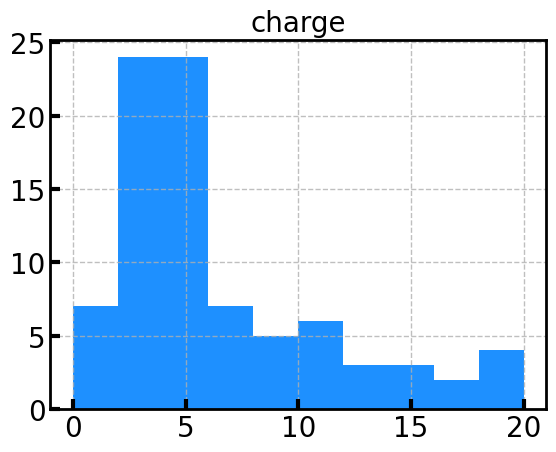

In [33]:
df_NuMu_6_8[mask].hist(column='charge', bins=10, range=(0, 20))

In [28]:
max_charge_row = df_NuMu_6_8[mask].loc[df_NuMu_6_8[mask]['charge'].idxmax()]
print(max_charge_row)


charge               2374.925049
dom_time            12513.000000
width                   8.000000
dom_x                 544.070000
dom_y                  55.890000
dom_z                 264.500000
pmt_area                0.044400
rde                     1.000000
is_bright_dom          -1.000000
is_bad_dom             -1.000000
is_saturated_dom        1.000000
is_errata_dom           1.000000
event_time          59000.171844
hlc                     1.000000
awtd                    0.000000
string                 40.000000
pmt_number              0.000000
dom_number             15.000000
dom_type               20.000000
event_no              624.000000
Name: 4324797, dtype: float64


In [ ]:
df_NuMu_6_8['charge'].hist(bins=100)

In [13]:
df_NuMu_6_8_truth = convertDBtoDF(db_NuMu_6_8, "truth", 100000)
# 2 min

In [14]:
df_NuMu_6_8_truth.columns

Index(['energy', 'position_x', 'position_y', 'position_z', 'azimuth', 'zenith',
       'pid', 'event_time', 'interaction_type', 'elasticity', 'RunID',
       'SubrunID', 'EventID', 'SubEventID', 'dbang_decay_length',
       'track_length', 'stopped_muon', 'energy_track', 'energy_cascade',
       'inelasticity', 'DeepCoreFilter_13', 'CascadeFilter_13',
       'MuonFilter_13', 'OnlineL2Filter_17', 'L3_oscNext_bool',
       'L4_oscNext_bool', 'L5_oscNext_bool', 'L6_oscNext_bool',
       'L7_oscNext_bool', 'Homogenized_QTot', 'MCLabelClassification',
       'MCLabelCoincidentMuons', 'MCLabelBgMuonMCPE',
       'MCLabelBgMuonMCPECharge', 'GNLabelTrackEnergyDeposited',
       'GNLabelTrackEnergyOnEntrance', 'GNLabelTrackEnergyOnEntrancePrimary',
       'GNLabelTrackEnergyDepositedPrimary', 'GNLabelEnergyPrimary',
       'GNLabelCascadeEnergyDepositedPrimary', 'GNLabelCascadeEnergyDeposited',
       'GNLabelEnergyDepositedTotal', 'GNLabelEnergyDepositedPrimary',
       'GNLabelHighestEInIcePa

In [22]:
df_NuMu_6_8_truth[['position_x', 'position_y', 'position_z']]

,position_x,position_y,position_z
0,4.413257e+02,-1.134763e+03,1.947884e+03
1,1.150305e+06,-1.315402e+06,-2.422512e+05
2,-2.110016e+03,1.871605e+02,1.947648e+03
3,2.609275e+02,-1.654963e+03,1.947780e+03
4,1.944014e+03,3.089538e+03,1.946955e+03
...,...,...,...
29381,-9.147304e+02,1.599477e+02,1.947932e+03
29382,2.407730e+03,2.092120e+03,1.947202e+03
29383,-2.352021e+03,-1.292281e+03,1.947435e+03
29384,-3.179350e+06,4.552421e+06,-9.502167e+06


In [36]:
df_NuMu_6_8_truth['DeepCoreFilter_13'].value_counts()

DeepCoreFilter_13
0.0    28719
1.0      667
Name: count, dtype: int64

In [37]:
df_NuMu_6_8_truth['CascadeFilter_13'].value_counts()

CascadeFilter_13
1.0    18114
0.0    11272
Name: count, dtype: int64

In [38]:
df_NuMu_6_8_truth['MuonFilter_13'].value_counts()

MuonFilter_13
1.0    26176
0.0     3210
Name: count, dtype: int64

In [34]:
df_NuMu_6_8_truth[['DeepCoreFilter_13', 'CascadeFilter_13','MuonFilter_13']]

,DeepCoreFilter_13,CascadeFilter_13,MuonFilter_13
0,0.0,0.0,0.0
1,0.0,1.0,1.0
2,0.0,0.0,1.0
3,0.0,1.0,1.0
4,0.0,1.0,1.0
...,...,...,...
29381,0.0,0.0,1.0
29382,0.0,1.0,1.0
29383,0.0,1.0,1.0
29384,0.0,1.0,1.0


In [23]:
df_NuMu_6_8_truth['energy_track'].value_counts()

energy_track
-1.000000e+00    29284
 0.000000e+00       19
 1.201948e+06        2
 1.441746e+07        2
 6.786467e+06        2
                 ...  
 1.586677e+06        1
 3.788963e+06        1
 1.397290e+06        1
 9.378317e+06        1
 1.880059e+06        1
Name: count, Length: 82, dtype: int64

In [24]:
df_NuMu_6_8_truth['energy_cascade'].value_counts()

energy_cascade
-1.000000e+00    29284
 1.823670e+02        2
 4.054703e+02        2
 1.053989e+02        2
 8.588312e+02        1
                 ...  
 8.955036e+02        1
 6.787026e+02        1
 5.164571e+06        1
 5.805719e+02        1
 5.322728e+02        1
Name: count, Length: 100, dtype: int64

In [25]:
df_NuMu_6_8_truth['track_length'].value_counts()

track_length
-1.0    29386
Name: count, dtype: int64

In [26]:
df_NuMu_6_8_truth['dbang_decay_length'].value_counts()

dbang_decay_length
-1.000000e+00    23227
 0.000000e+00        4
 1.241777e+06        2
 6.080187e+05        2
 1.273135e+05        2
                 ...  
 9.767050e+04        1
 7.872545e+05        1
 3.451567e+05        1
 4.494557e+05        1
 9.763900e+05        1
Name: count, Length: 6088, dtype: int64

In [27]:
df_NuMu_6_8_truth['stopped_muon'].value_counts()

stopped_muon
-1.0    29386
Name: count, dtype: int64

In [28]:
df_NuMu_6_8_truth['interaction_type'].value_counts()

interaction_type
1.0    26876
2.0     2510
Name: count, dtype: int64

In [29]:
df_NuMu_6_8[df_NuMu_6_8['charge']<0]

,charge,dom_time,width,dom_x,dom_y,dom_z,pmt_area,rde,is_bright_dom,is_bad_dom,is_saturated_dom,is_errata_dom,event_time,hlc,awtd,string,pmt_number,dom_number,dom_type,event_no


In [30]:
df_corsika_5_1.head(10)

,charge,dom_time,width,dom_x,dom_y,dom_z,pmt_area,rde,is_bright_dom,is_bad_dom,is_saturated_dom,is_errata_dom,event_time,hlc,awtd,string,pmt_number,dom_number,dom_type,event_no
0,1.575,11353.0,8.0,-9.130000,-481.73999,-470.950012,0.0444,1.0,-1.0,-1.0,-1.0,-1.0,56783.915364,0.0,0.0,3.0,0.0,58.0,20.0,0
1,0.325,10289.0,1.0,114.389999,-461.98999,-250.250000,0.0444,1.0,-1.0,-1.0,-1.0,-1.0,56783.915364,1.0,1.0,4.0,0.0,45.0,20.0,0
2,0.625,10892.0,1.0,114.389999,-461.98999,-284.290009,0.0444,1.0,-1.0,-1.0,-1.0,-1.0,56783.915364,1.0,1.0,4.0,0.0,47.0,20.0,0
3,0.875,10133.0,1.0,114.389999,-461.98999,-352.369995,0.0444,1.0,-1.0,-1.0,-1.0,-1.0,56783.915364,1.0,1.0,4.0,0.0,51.0,20.0,0
4,1.125,10184.0,1.0,114.389999,-461.98999,-352.369995,0.0444,1.0,-1.0,-1.0,-1.0,-1.0,56783.915364,1.0,1.0,4.0,0.0,51.0,20.0,0
5,0.775,10217.0,1.0,114.389999,-461.98999,-386.410004,0.0444,1.0,-1.0,-1.0,-1.0,-1.0,56783.915364,1.0,1.0,4.0,0.0,53.0,20.0,0
6,0.775,10656.0,1.0,114.389999,-461.98999,-420.459991,0.0444,1.0,-1.0,-1.0,-1.0,-1.0,56783.915364,1.0,1.0,4.0,0.0,55.0,20.0,0
7,1.025,10786.0,1.0,114.389999,-461.98999,-454.500000,0.0444,1.0,-1.0,-1.0,-1.0,-1.0,56783.915364,1.0,1.0,4.0,0.0,57.0,20.0,0
8,1.625,10262.0,1.0,114.389999,-461.98999,-471.519989,0.0444,1.0,-1.0,-1.0,-1.0,-1.0,56783.915364,1.0,1.0,4.0,0.0,58.0,20.0,0
9,0.725,11733.0,8.0,114.389999,-461.98999,-471.519989,0.0444,1.0,-1.0,-1.0,-1.0,-1.0,56783.915364,1.0,0.0,4.0,0.0,58.0,20.0,0


In [15]:
df_corsika_3_1.head(10)

,charge,dom_time,width,dom_x,dom_y,dom_z,pmt_area,rde,is_bright_dom,is_bad_dom,is_saturated_dom,is_errata_dom,event_time,hlc,awtd,string,pmt_number,dom_number,dom_type,event_no
0,0.325,13096.0,1.0,237.779999,-442.420013,41.900002,0.0444,1.0,-1.0,-1.0,-1.0,-1.0,56783.915364,1.0,1.0,5.0,0.0,28.0,20.0,0
1,0.125,13308.0,1.0,237.779999,-442.420013,41.900002,0.0444,1.0,-1.0,-1.0,-1.0,-1.0,56783.915364,1.0,1.0,5.0,0.0,28.0,20.0,0
2,0.425,13055.0,1.0,237.779999,-442.420013,24.879999,0.0444,1.0,-1.0,-1.0,-1.0,-1.0,56783.915364,1.0,1.0,5.0,0.0,29.0,20.0,0
3,0.675,13840.0,1.0,237.779999,-442.420013,7.860000,0.0444,1.0,-1.0,-1.0,-1.0,-1.0,56783.915364,1.0,1.0,5.0,0.0,30.0,20.0,0
4,1.175,12551.0,1.0,361.000000,-422.829987,91.019997,0.0444,1.0,-1.0,-1.0,-1.0,-1.0,56783.915364,1.0,1.0,6.0,0.0,25.0,20.0,0
5,0.975,12521.0,1.0,361.000000,-422.829987,74.000000,0.0444,1.0,-1.0,-1.0,-1.0,-1.0,56783.915364,1.0,1.0,6.0,0.0,26.0,20.0,0
6,0.775,13691.0,8.0,361.000000,-422.829987,74.000000,0.0444,1.0,-1.0,-1.0,-1.0,-1.0,56783.915364,1.0,0.0,6.0,0.0,26.0,20.0,0
7,0.975,13997.0,8.0,361.000000,-422.829987,74.000000,0.0444,1.0,-1.0,-1.0,-1.0,-1.0,56783.915364,1.0,0.0,6.0,0.0,26.0,20.0,0
8,1.325,12420.0,1.0,361.000000,-422.829987,56.980000,0.0444,1.0,-1.0,-1.0,-1.0,-1.0,56783.915364,1.0,1.0,6.0,0.0,27.0,20.0,0
9,0.775,12440.0,1.0,361.000000,-422.829987,56.980000,0.0444,1.0,-1.0,-1.0,-1.0,-1.0,56783.915364,1.0,1.0,6.0,0.0,27.0,20.0,0


In [16]:
df_corsika_7_7.head(10)

,charge,dom_time,width,dom_x,dom_y,dom_z,pmt_area,rde,is_bright_dom,is_bad_dom,is_saturated_dom,is_errata_dom,event_time,hlc,awtd,string,pmt_number,dom_number,dom_type,event_no
0,1.175,10361.0,1.0,114.389999,-461.98999,498.660004,0.0444,1.0,-1.0,-1.0,-1.0,-1.0,56783.915364,1.0,1.0,4.0,0.0,1.0,20.0,1396273
1,0.525,11370.0,8.0,114.389999,-461.98999,498.660004,0.0444,1.0,-1.0,-1.0,-1.0,-1.0,56783.915364,1.0,0.0,4.0,0.0,1.0,20.0,1396273
2,0.575,9871.0,1.0,114.389999,-461.98999,481.640015,0.0444,1.0,-1.0,-1.0,-1.0,-1.0,56783.915364,1.0,1.0,4.0,0.0,2.0,20.0,1396273
3,3.275,9880.0,1.0,114.389999,-461.98999,481.640015,0.0444,1.0,-1.0,-1.0,-1.0,-1.0,56783.915364,1.0,1.0,4.0,0.0,2.0,20.0,1396273
4,1.875,9895.0,1.0,114.389999,-461.98999,481.640015,0.0444,1.0,-1.0,-1.0,-1.0,-1.0,56783.915364,1.0,1.0,4.0,0.0,2.0,20.0,1396273
5,0.775,9955.0,1.0,114.389999,-461.98999,481.640015,0.0444,1.0,-1.0,-1.0,-1.0,-1.0,56783.915364,1.0,1.0,4.0,0.0,2.0,20.0,1396273
6,0.825,10114.0,1.0,114.389999,-461.98999,481.640015,0.0444,1.0,-1.0,-1.0,-1.0,-1.0,56783.915364,1.0,1.0,4.0,0.0,2.0,20.0,1396273
7,0.775,10143.0,1.0,114.389999,-461.98999,481.640015,0.0444,1.0,-1.0,-1.0,-1.0,-1.0,56783.915364,1.0,1.0,4.0,0.0,2.0,20.0,1396273
8,1.025,10760.0,1.0,114.389999,-461.98999,464.619995,0.0444,1.0,-1.0,-1.0,-1.0,-1.0,56783.915364,1.0,1.0,4.0,0.0,3.0,20.0,1396273
9,1.175,10142.0,1.0,114.389999,-461.98999,447.600006,0.0444,1.0,-1.0,-1.0,-1.0,-1.0,56783.915364,1.0,1.0,4.0,0.0,4.0,20.0,1396273


In [17]:
df_corsika_3_1_truth.head(10)['pid'].unique()

array([2212.])

In [18]:
df_corsika_3_1_truth.columns

Index(['energy', 'position_x', 'position_y', 'position_z', 'azimuth', 'zenith',
       'pid', 'event_time', 'interaction_type', 'elasticity', 'RunID',
       'SubrunID', 'EventID', 'SubEventID', 'dbang_decay_length',
       'track_length', 'stopped_muon', 'energy_track', 'energy_cascade',
       'inelasticity', 'DeepCoreFilter_13', 'CascadeFilter_13',
       'MuonFilter_13', 'OnlineL2Filter_17', 'L3_oscNext_bool',
       'L4_oscNext_bool', 'L5_oscNext_bool', 'L6_oscNext_bool',
       'L7_oscNext_bool', 'Homogenized_QTot', 'MCLabelClassification',
       'MCLabelCoincidentMuons', 'MCLabelBgMuonMCPE',
       'MCLabelBgMuonMCPECharge', 'GNLabelTrackEnergyDeposited',
       'GNLabelTrackEnergyOnEntrance', 'GNLabelTrackEnergyOnEntrancePrimary',
       'GNLabelTrackEnergyDepositedPrimary', 'GNLabelEnergyPrimary',
       'GNLabelCascadeEnergyDepositedPrimary', 'GNLabelCascadeEnergyDeposited',
       'GNLabelEnergyDepositedTotal', 'GNLabelEnergyDepositedPrimary',
       'GNLabelHighestEInIcePa

In [26]:
df_corsika_3_1_truth['energy_cascade'].value_counts()

energy_cascade
2.911520e+06    3
2.753166e+06    2
2.587496e+06    2
9.485429e+06    2
8.529739e+06    2
               ..
1.238408e+06    1
2.030513e+06    1
1.149920e+06    1
1.802597e+06    1
4.886806e+06    1
Name: count, Length: 722, dtype: int64

In [19]:
df_corsika_5_1_truth.head(10)

,energy,position_x,position_y,position_z,azimuth,zenith,pid,event_time,interaction_type,elasticity,...,GNLabelCascadeEnergyDeposited,GNLabelEnergyDepositedTotal,GNLabelEnergyDepositedPrimary,GNLabelHighestEInIceParticleIsChild,GNLabelHighestEInIceParticleDistance,GNLabelHighestEInIceParticleEFraction,GNLabelHighestEInIceParticleEOnEntrance,GNLabelHighestEDaughterDistance,GNLabelHighestEDaughterEFraction,event_no
0,1.571089e+06,25152.565223,-80017.116959,111400.913556,5.016308,0.640399,2212.0,1.087909e+17,-1.0,-1.0,...,0.0,9.732804,1.481633,1.0,696.267529,0.003610,1235.479966,693.044847,0.003610,0
1,3.263975e+06,31509.888287,-85163.269728,111299.212765,5.065972,0.684746,2212.0,1.087909e+17,-1.0,-1.0,...,0.0,10343.176055,533.316813,1.0,93.961599,0.001557,3845.597609,93.457331,0.001557,1
2,3.263975e+06,32162.699531,-85419.597865,111299.021796,5.065972,0.684746,2212.0,1.087909e+17,-1.0,-1.0,...,0.0,244.026326,0.000000,1.0,668.278016,0.001003,1586.233446,669.157640,0.001557,2
3,1.245476e+06,-284382.620208,-44518.431120,105778.740461,3.295244,1.217942,2212.0,1.087909e+17,-1.0,-1.0,...,0.0,189.111810,189.111810,1.0,514.917442,0.003158,633.071924,514.917442,0.003158,3
4,1.849264e+06,97353.650527,-40141.865080,111098.887136,5.889868,0.755436,2212.0,1.087909e+17,-1.0,-1.0,...,0.0,824.393579,0.000000,1.0,540.038617,0.001755,1690.204050,540.038617,0.001755,4
5,4.772058e+06,55864.220234,-74839.122183,111265.020708,5.348843,0.698180,2212.0,1.087909e+17,-1.0,-1.0,...,0.0,8565.022711,383.433159,1.0,445.963857,0.000795,2616.226596,437.827380,0.001068,5
6,4.772058e+06,55088.008005,-75284.417706,111265.040773,5.348843,0.698180,2212.0,1.087909e+17,-1.0,-1.0,...,0.0,9362.626692,0.000000,1.0,446.818003,0.000838,3131.012576,438.249922,0.001068,6
7,1.203121e+06,28454.196053,6756.447446,111851.173552,0.237377,0.254319,2212.0,1.087909e+17,-1.0,-1.0,...,0.0,3284.947674,192.253675,1.0,206.008391,0.003318,3208.574823,206.008391,0.003318,7
8,1.415912e+06,373178.139736,-114822.004220,100677.348377,5.984162,1.317530,2212.0,1.087909e+17,-1.0,-1.0,...,0.0,996.054383,783.900109,1.0,424.493291,0.009176,1442.410948,424.493291,0.009176,8
9,1.787164e+07,115808.951668,180100.385649,108456.155925,0.999483,1.104697,2212.0,1.087909e+17,-1.0,-1.0,...,0.0,2143.994319,0.000000,1.0,665.114587,0.000385,4345.752301,659.309721,0.000405,9


In [20]:
df_corsika_7_7_truth.head(10)

,energy,position_x,position_y,position_z,azimuth,zenith,pid,event_time,interaction_type,elasticity,...,GNLabelCascadeEnergyDeposited,GNLabelEnergyDepositedTotal,GNLabelEnergyDepositedPrimary,GNLabelHighestEInIceParticleIsChild,GNLabelHighestEInIceParticleDistance,GNLabelHighestEInIceParticleEFraction,GNLabelHighestEInIceParticleEOnEntrance,GNLabelHighestEDaughterDistance,GNLabelHighestEDaughterEFraction,event_no
0,1.006049e+06,108708.998473,-156988.239302,109187.236149,5.318774,1.052416,2212.0,1.087909e+17,-1.0,-1.0,...,0.0,4457.550273,544.968802,1.0,269.291968,0.015290,6522.812924,269.291968,0.015290,1396273
1,1.397321e+06,-129349.054786,-228361.338569,106771.007226,4.196499,1.185106,2212.0,1.087909e+17,-1.0,-1.0,...,0.0,4736.759518,451.483621,1.0,237.425181,0.023411,17747.006683,237.425181,0.023411,1396274
2,1.251381e+06,347307.692155,-32903.765175,102862.033114,6.188577,1.284214,2212.0,1.087909e+17,-1.0,-1.0,...,0.0,334.559577,334.559577,1.0,78.073675,0.006522,945.668152,78.073675,0.006522,1396275
3,1.276502e+07,48126.555450,-15810.122669,111726.292229,5.958082,0.422088,2212.0,1.087909e+17,-1.0,-1.0,...,0.0,4894.747461,0.000000,1.0,586.608848,0.000268,2447.631703,610.523371,0.000397,1396276
4,1.276502e+07,47974.379587,-16192.081503,111726.313507,5.958082,0.422088,2212.0,1.087909e+17,-1.0,-1.0,...,0.0,8991.898680,0.000000,1.0,418.762876,0.000268,2484.835055,415.058102,0.000397,1396277
5,1.438591e+07,-179369.954617,-175766.418381,107190.610154,3.918947,1.168618,2212.0,1.087909e+17,-1.0,-1.0,...,0.0,2893.349616,129.192823,1.0,629.941870,0.000644,3984.447473,636.920224,0.000660,1396278
6,1.438591e+07,-180159.421617,-178105.398535,107188.906495,3.918947,1.168618,2212.0,1.087909e+17,-1.0,-1.0,...,0.0,0.000000,0.000000,1.0,789.578641,0.000447,1809.939840,785.328043,0.000660,1396279
7,4.817904e+06,50635.701942,-82391.412431,111209.591594,5.260615,0.718557,2212.0,1.087909e+17,-1.0,-1.0,...,0.0,2886.730692,0.000000,1.0,496.884299,0.001212,3945.278599,490.905593,0.002327,1396280
8,4.817904e+06,50944.579739,-83258.671891,111209.532658,5.260615,0.718557,2212.0,1.087909e+17,-1.0,-1.0,...,0.0,2143.198418,223.318460,1.0,278.543326,0.002327,5222.578473,278.543326,0.002327,1396281
9,2.222282e+06,7794.286650,269051.545777,106511.893161,1.543949,1.194427,2212.0,1.087909e+17,-1.0,-1.0,...,0.0,29.841595,0.000000,1.0,593.675241,0.002336,2189.188388,593.675241,0.002336,1396282
